# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.
The Yes Bank Stock Closing Price Prediction project aims to develop a machine learning model that can accurately predict the closing price of Yes Bank stock. The model is trained on historical data of Yes Bank's stock prices and relevant market data, such as indices and other economic indicators. The project focuses on applying advanced time-series analysis techniques to identify patterns and trends in the data that can be used to make predictions.

The project involves collecting and cleaning the data, conducting exploratory data analysis to gain insights into the data, feature engineering to create new features from the existing data, and building and training the machine learning model. The model is evaluated using appropriate performance metrics, such as mean absolute error and root mean square error, to determine its accuracy.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/kaushikk1999/Yes_Bank_Closing_Price_Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**
The problem statement for the Yes Bank Stock Closing Price Prediction project is to develop a reliable and accurate predictive model that can forecast the closing price of Yes Bank stocks for a given period of time based on historical stock data, news sentiment analysis, and other relevant market indicators. The goal is to create a machine learning model that can provide investors with valuable insights into the future performance of Yes Bank stocks, allowing them to make informed decisions regarding when to buy, sell, or hold their investments. This project aims to solve the challenge of predicting stock prices accurately, which is crucial for traders and investors to maximize their returns and minimize their risks in the stock market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
import numpy as np


from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA
#from fbprophet import Prophet                          # to build prophet

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

# Your code generating the warning

# Reset warning behavior (optional)
warnings.resetwarnings()


C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\239377298.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv(r'data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
df

Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

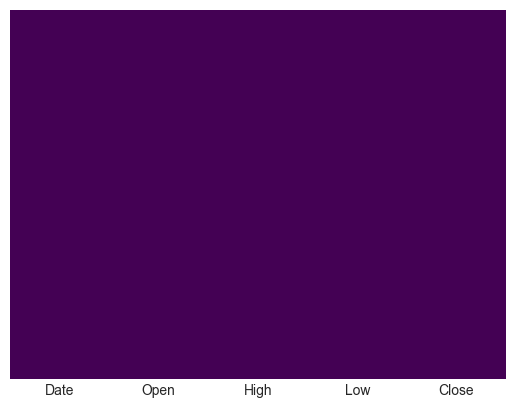

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### What did you know about your dataset?

Answer Here
there is no null values

## ***2. Understanding Your Variables***

# Dataset Columns
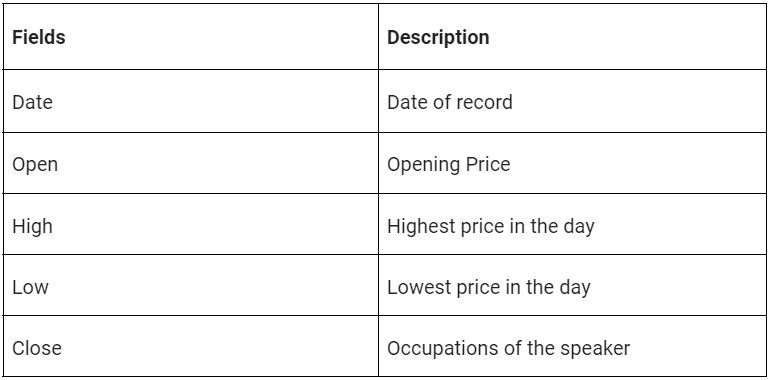

In [9]:
# Dataset Describe
df.describe(include='all')

Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000

### Variables Description 

Answer Here

Based on the table you provided, here's a description of the variables:

Date: the date of the stock market trading day
Open: the opening price of the stock on that trading day
High: the highest price the stock reached during the trading day
Low: the lowest price the stock reached during the trading day
Close: the closing price of the stock on that trading day
The "count" row indicates that there are 185 data points for each variable. The "unique" row indicates that there are no unique values for any of the variables, which is expected for continuous numerical data. The "top" and "freq" rows are not relevant for these variables. The "mean" row indicates the average value for each variable. The "min" and "max" rows indicate the minimum and maximum values, respectively, for each variable. The "25%", "50%", and "75%" rows indicate the values at the 25th, 50th, and 75th percentiles, respectively, for each variable.

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
print(df['Date'].unique())
print(df['Open'].unique())
print(df['High'].unique())
print(df['Low'].unique())
print(df['Close'].unique())


['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14' 'Aug-

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

### What all manipulations have you done and insights you found?

Answer Here.
changed the date column to date time to get insights

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

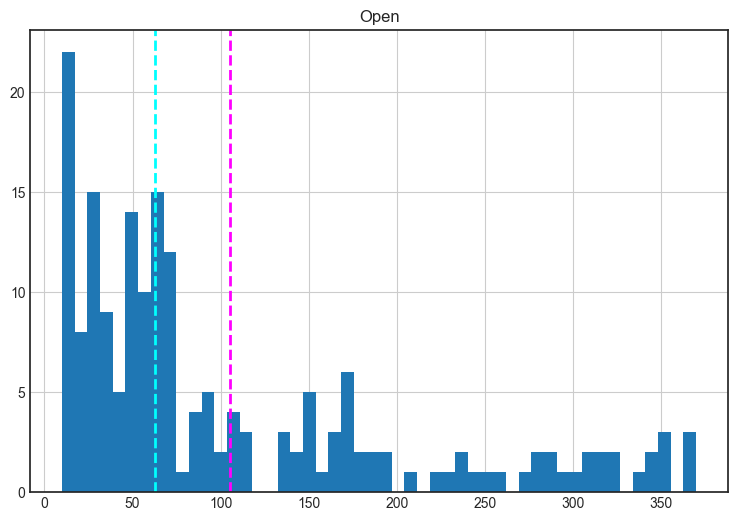

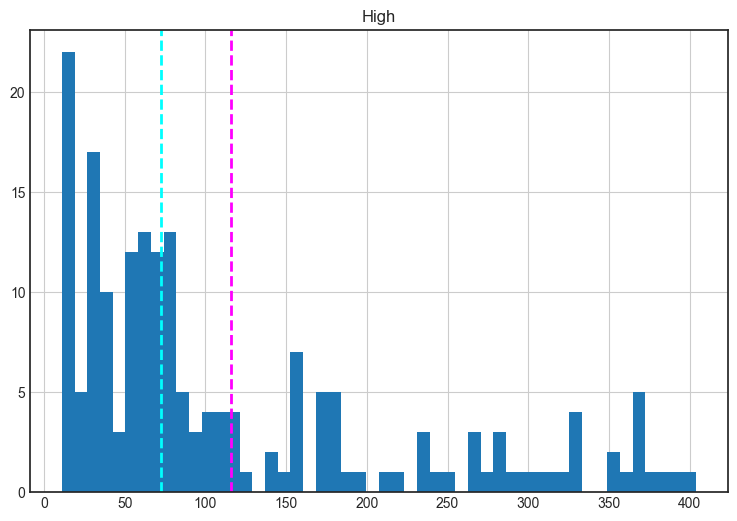

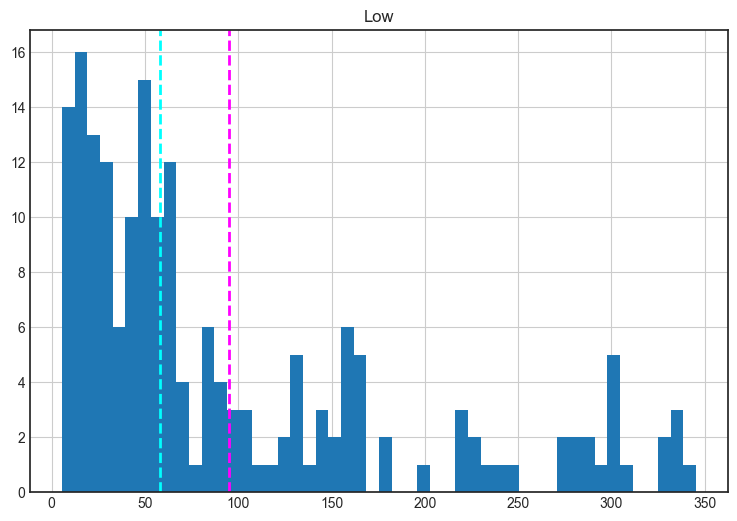

In [12]:
# Chart - 1 visualization code
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[1:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Check for skewness in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here
the company stock price mean median difference is not much

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
the company is in loss now as the stock is keeping on decreasing per year if it contuine it bankrupt soon

#### Chart - 2

C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\1194876529.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'],color="y")


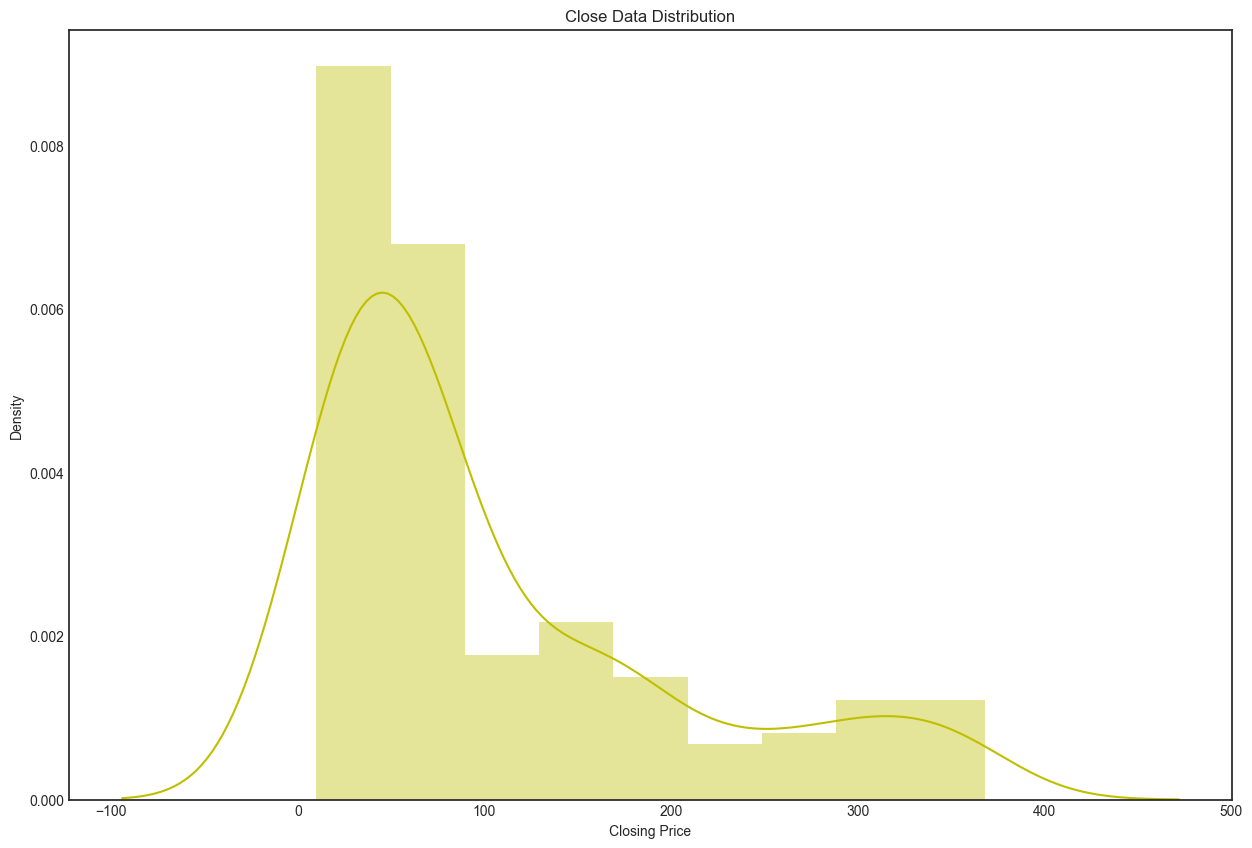

In [13]:
# Chart - 2 visualization code
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color="y")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
to see the density curve of the closing price of stock 

##### 2. What is/are the insight(s) found from the chart?

Answer 
between the year 2016 to 2018 the stock price were pretty high but after 2018 for once the stock price went high but after but came down badly

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
from this we should analyse what is causing downfall of the stock price to stablise it

#### Chart - 3

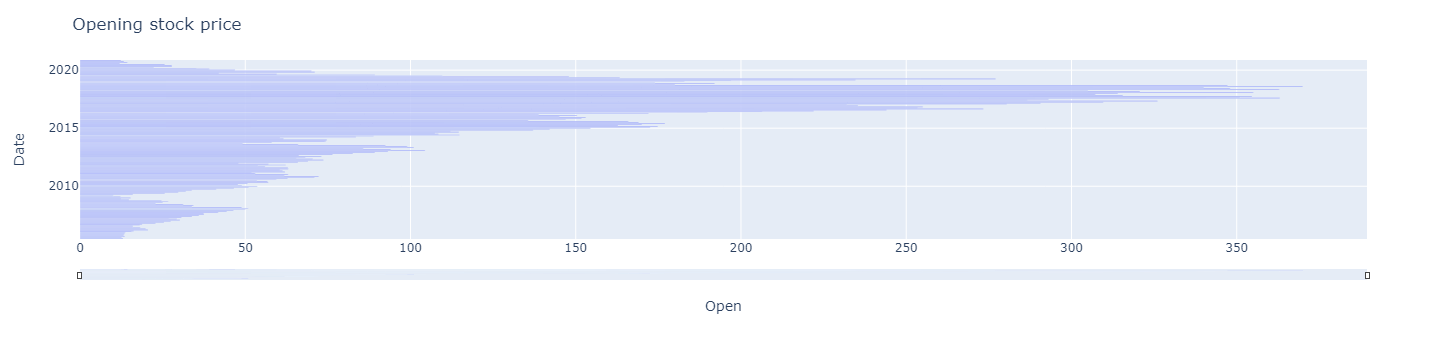

In [14]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df, x='Open', y='Date')
fig.update_layout(
    title='Opening stock price', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see the price with year

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the highest opening stock price was between 2015 till 2020 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

yes these are leading to negative growth as the opening stock price are coming down after 2020

#### Chart - 4

In [15]:
# Chart - 4 visualization code

# Separating the dependent and independent variables.
independent_variables = df.columns.tolist()[1:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)
     

['Open', 'High', 'Low']
['Close']


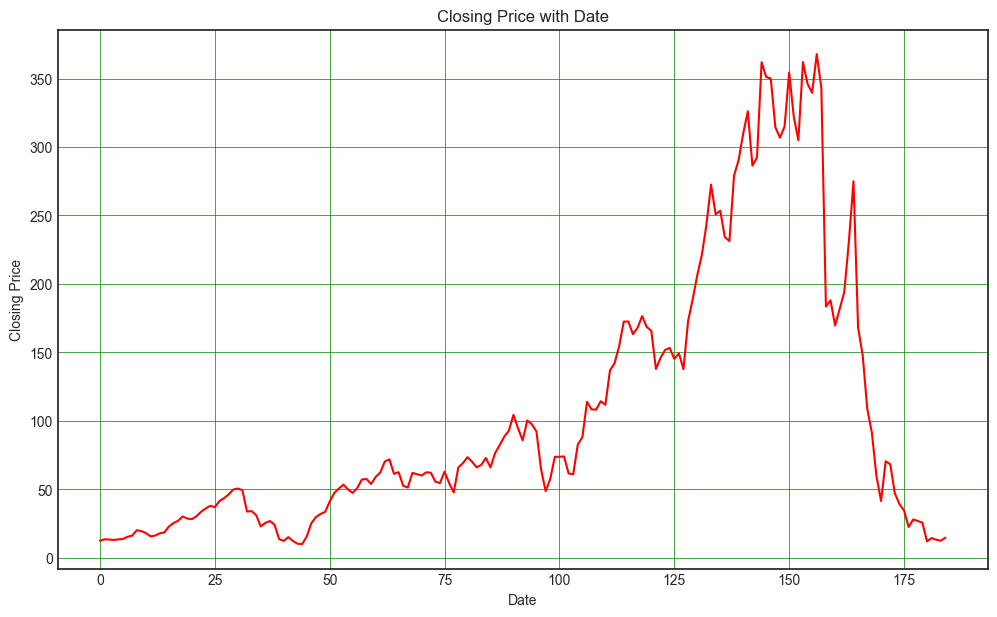

In [16]:
# Plotting the dependent variable .
plt.figure(figsize=(12,7))
df['Close'].plot(color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()
     


##### 1. Why did you pick the specific chart?

Answer Here.

to see the distribution of price over the year

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can see that the stock price is rising up until 2018 when the fraud case involving Rana Kapoor happened after which the stock price has had a sharp decline.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It lead to negative growth as price is coming over gradually over the years

#### Chart - 5

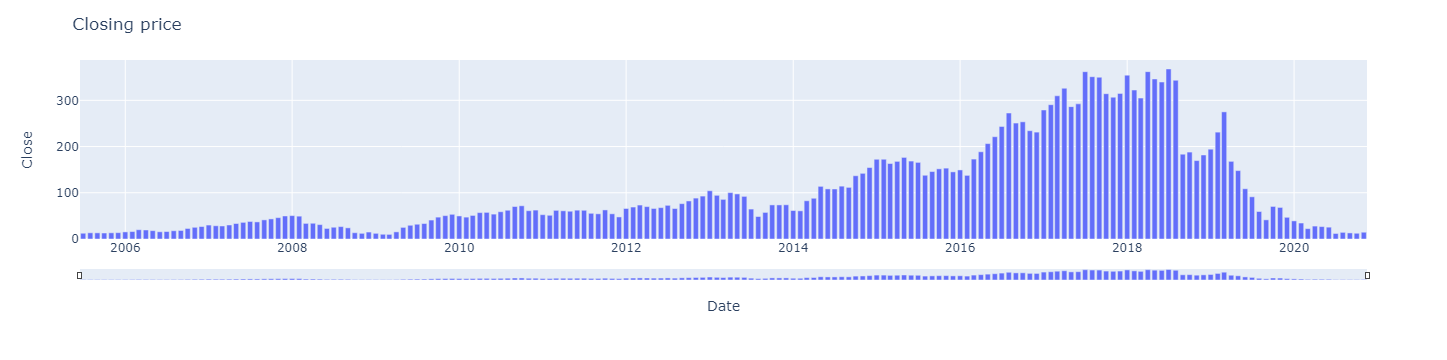

In [17]:
# Chart - 5 visualization code
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df, x='Date', y='Close')
fig.update_layout(
    title=' Closing price', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see price distribution per year

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the closing price was increasing gradually till 2018 but after it dropped 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

from this I can say that the company is in loss now and not performing well as the stock price is not going up

#### Chart - 6

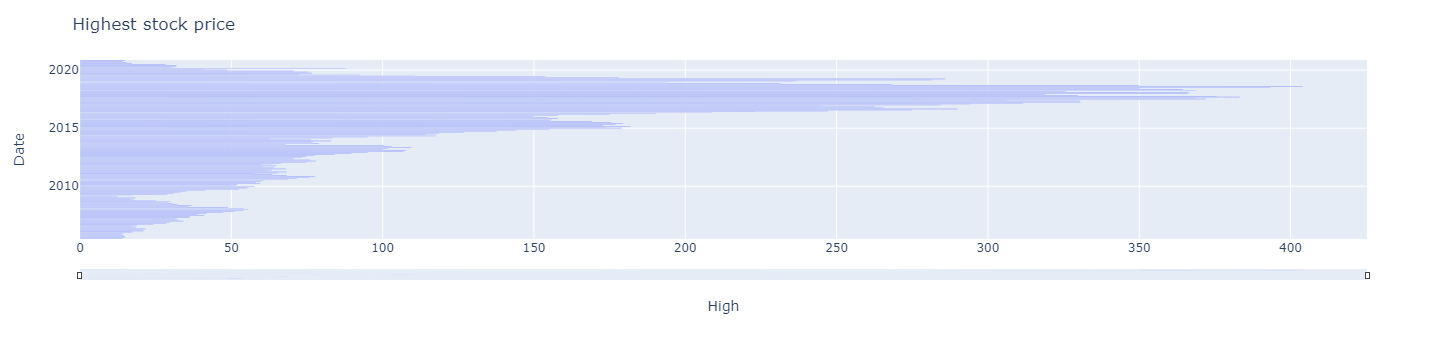

In [18]:
# Chart - 6 visualization code
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df, x='High', y='Date')
fig.update_layout(
    title='Highest stock price', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see price of stock  when it was highest

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The price of the stock was highest during the year 2018-19.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The company is now a loss making company. It should analyse thye downfall of its stock price and analyse the growth and why it was the highest during 2018-19

#### Chart - 7

In [19]:
# Chart - 7 visualization code


In [20]:
df1 = df[df['Date'] >= pd.to_datetime('2017-01-20')]

In [21]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df1, x='High', y='Date')
fig.update_layout(
    title='Highest price of stock after 2017', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

##### 1. Why did you pick the specific chart?

Answer Here.

to see the price

##### 2. What is/are the insight(s) found from the chart?

Answer Here

after 2017, there were some ups and downs in the stock price as it was trying to stabilise itself this happened till 2019. But after 2019 the stock prices went down rapidly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It is leading to negative growth as it is struggling to stabilise the stock price after 2019

#### Chart - 8

In [22]:
# Chart - 8 visualization code
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df1, x='Open', y='Date')
fig.update_layout(
    title='opening price of stock after 2017', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

##### 1. Why did you pick the specific chart?

Answer Here.

To sse the opening price of stock

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The opening price was pretty normal till 2018 between 250-350 but the stock price came down till 170 then went high up till 280 but it was its last hike and after that it came down drastically.And the current stock price is under 50

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It is leading to negative growth as it is not performing well from the initial phase itself

#### Chart - 9

In [23]:
# Chart - 9 visualization code
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(df1, x='Close', y='Date')
fig.update_layout(
    title='closing price of stock after 2017', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

##### 1. Why did you pick the specific chart?

Answer Here.

To see the closing price of stock

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The opening prce of the stock after 2017 till 2018 were arond 300-350 but after that it came down and went high up for some time till 290 and after that fell drastically.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It is leading to negative growth asb it struggling to stabilise stock prices in the market.

#### Chart - 10

C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\2111422916.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




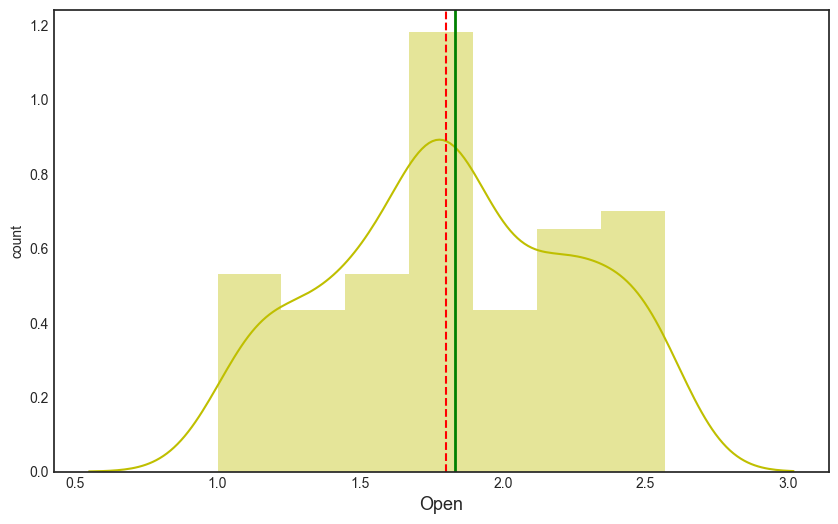

C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\2111422916.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




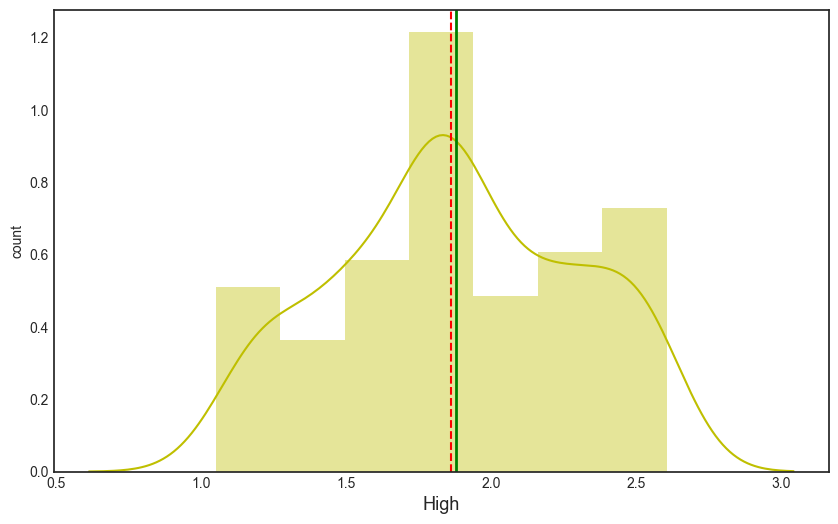

C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\2111422916.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




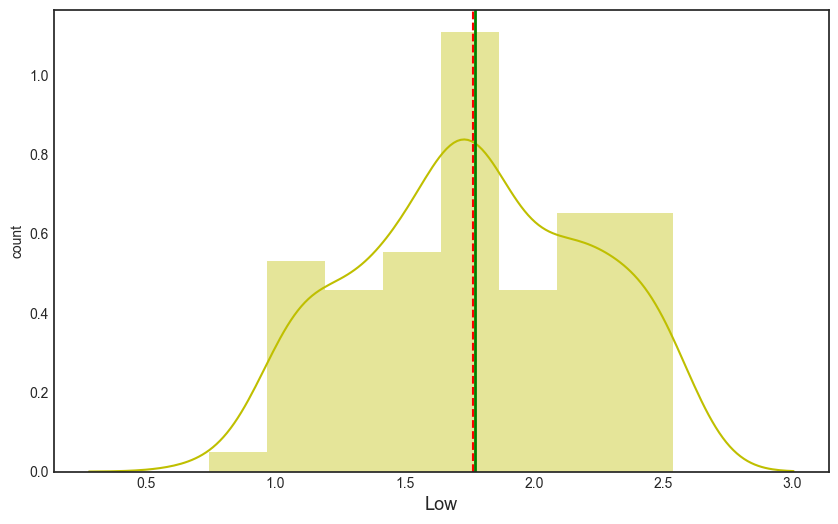

C:\Users\yokau\AppData\Local\Temp\ipykernel_16212\2111422916.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




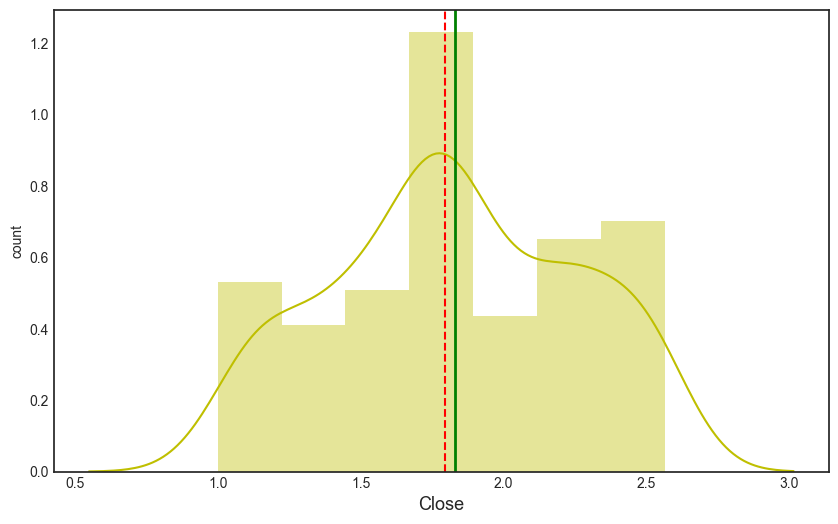

In [24]:
# Lets use log transformation on these features using np.log() and plot them.
for col in df.columns[1:]:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(df[col]), color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(df[col]).mean(),color='green',linewidth=2) 
  plt.axvline(np.log10(df[col]).median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()
    
    
    
    
    
    

##### 1. Why did you pick the specific chart?

Answer Here.

To check skeweness

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is not musch difference between the mean and median after log transformation.
Now, the distributions are *very similar to Normal distribution. The mean and median values are nearly same.*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

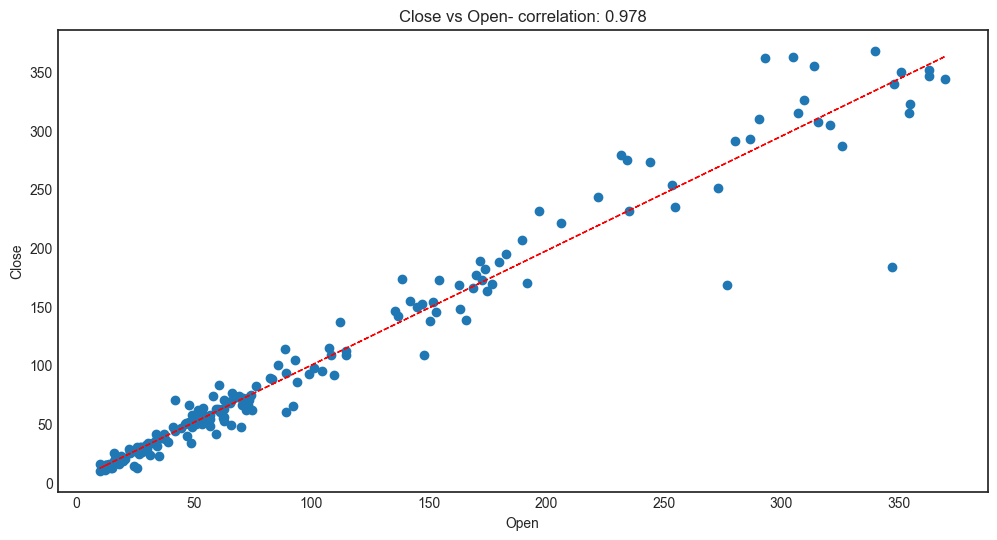

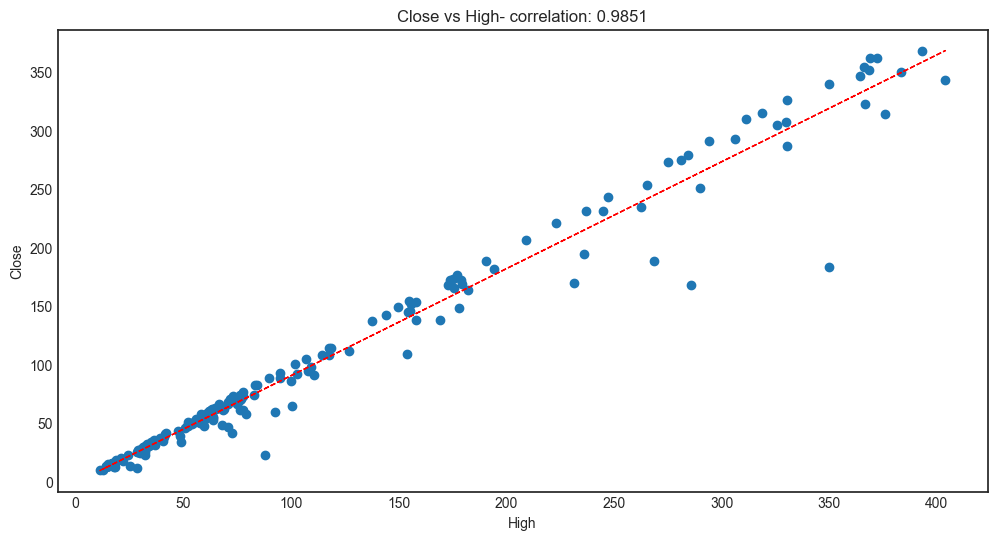

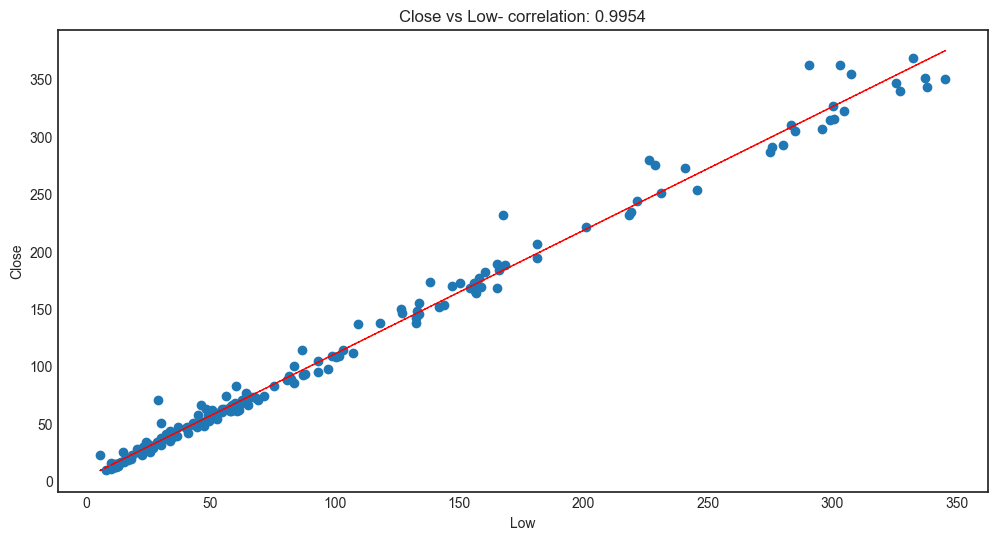

In [25]:
# Plotting the independent variables against dependent variable close and also checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.  

  # Setting the x,y labels and the title.
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))

  z = np.polyfit(df[col], df['Close'], 1)                                
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To check closing price 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Close vs open - correlation 0.978
Close vs open - correlation 0.9851
Close vs open - correlation 0.9954
We can see that all of our independent variables are highly correlated to the dependent variable.

And the relationship between dependent and independent variables is linear in nature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

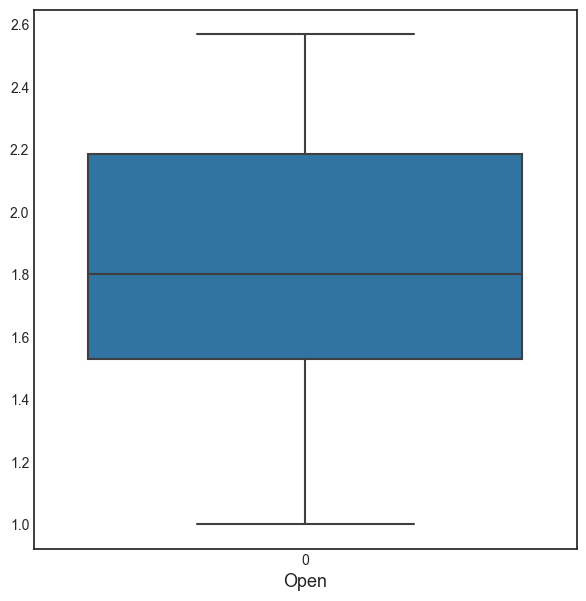

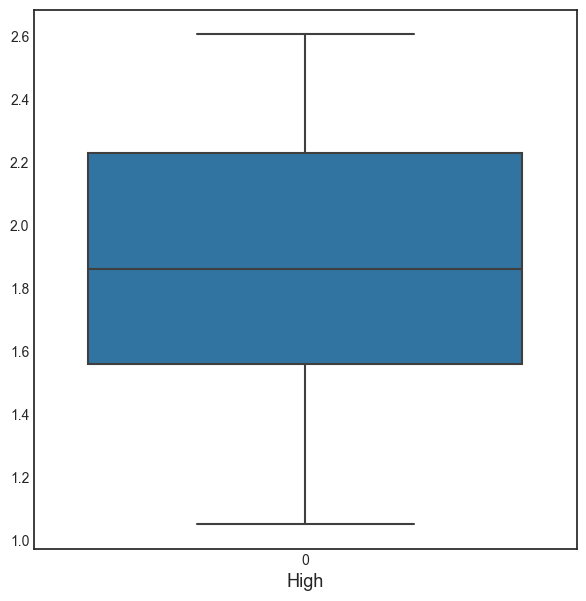

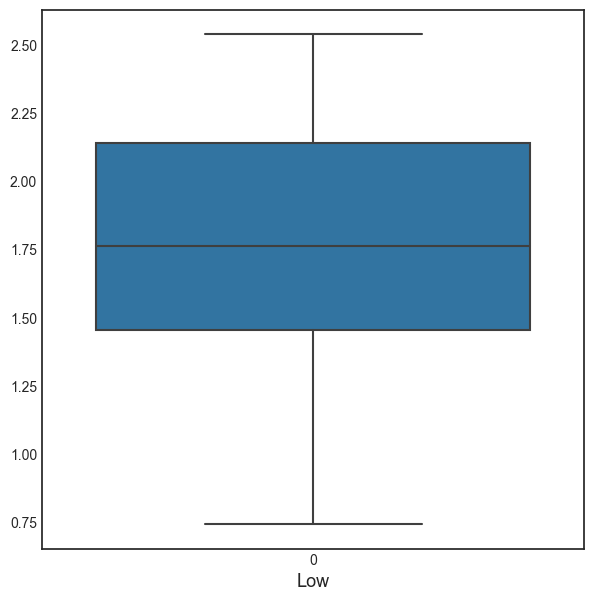

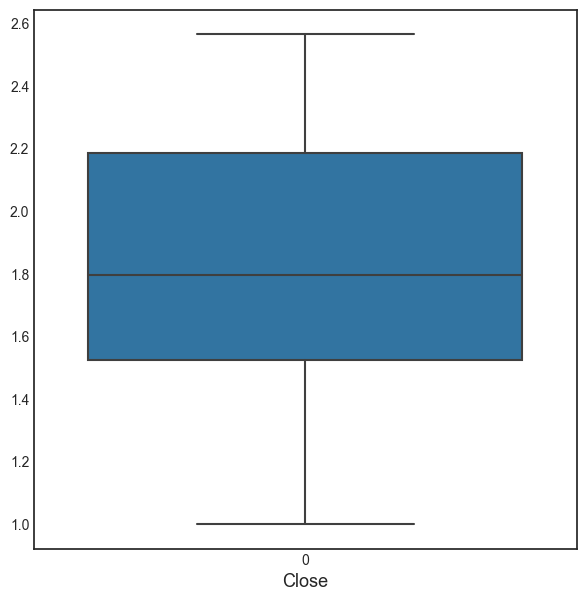

In [26]:
# Chart - 12 visualization code
# Let's check for outliers now in the transformed variable data.
for col in df.columns[1:]:
  plt.figure(figsize=(7,7))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see outliers

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Now, we have no outliers anymore. Log transformation diminishes the outlier's effect.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [27]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

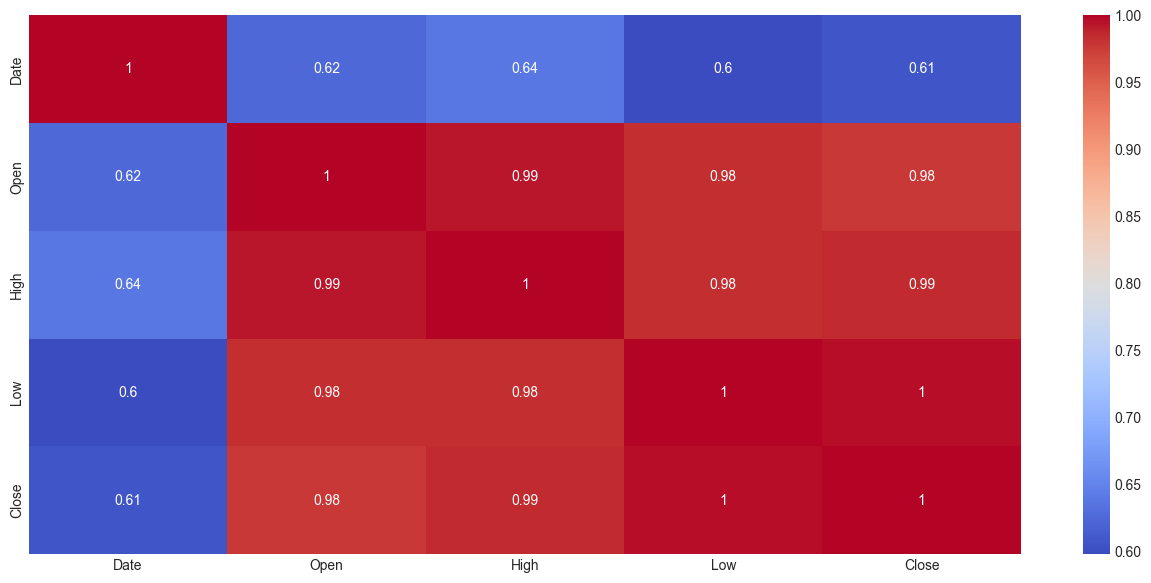

In [28]:
# Correlation Heatmap visualization code

# Now let's visualise for the correlation among all variables.
corr = df.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

to see correlation


##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally not have high correlation with one another.

*This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.*



#### Chart - 15 - Pair Plot 

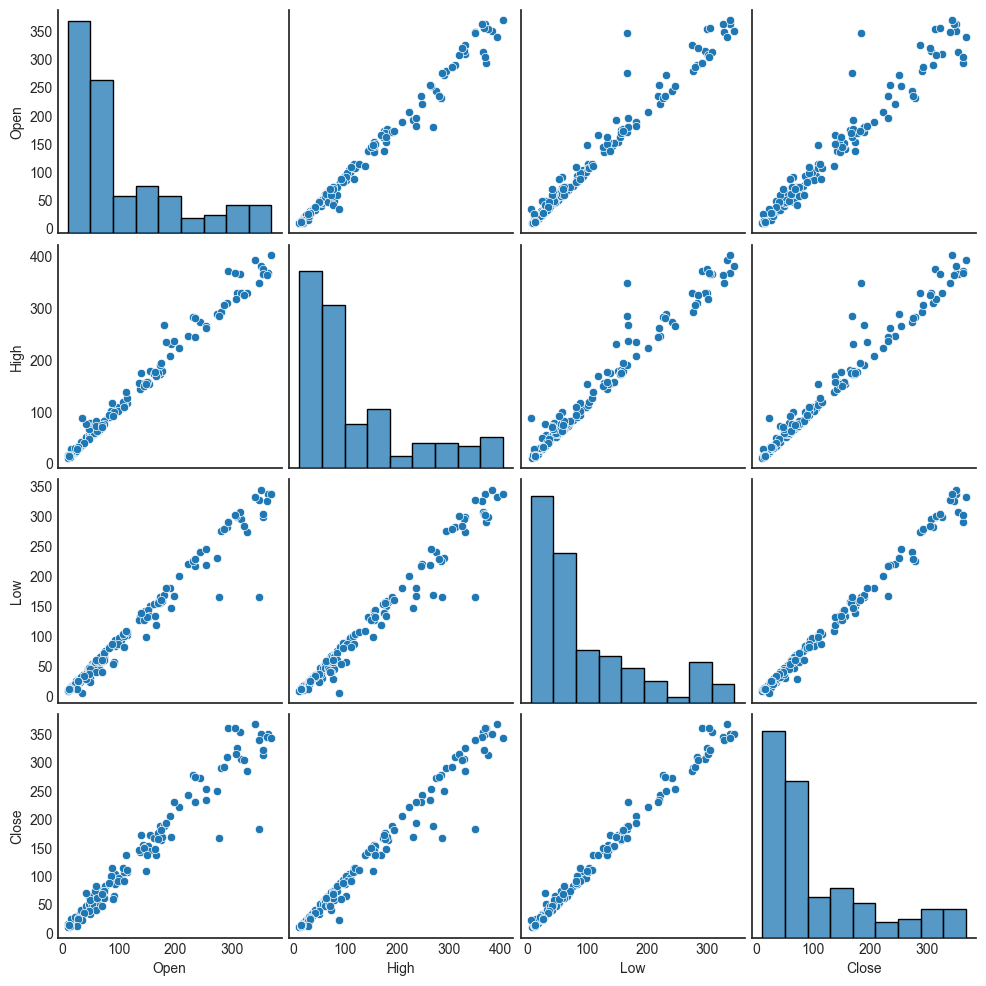

In [29]:
# Pair Plot visualization code

# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*185,5))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [34]:
# Functions to address missing data

# Explore features
def feat_explore(column):
    return df[column].value_counts()

# Function to impute missing values
def feat_impute(column, value):
    df.loc[df[column].isnull(),column] = value

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

i used df.isnull().sum() to check to any null values present or not

### 2. Handling Outliers

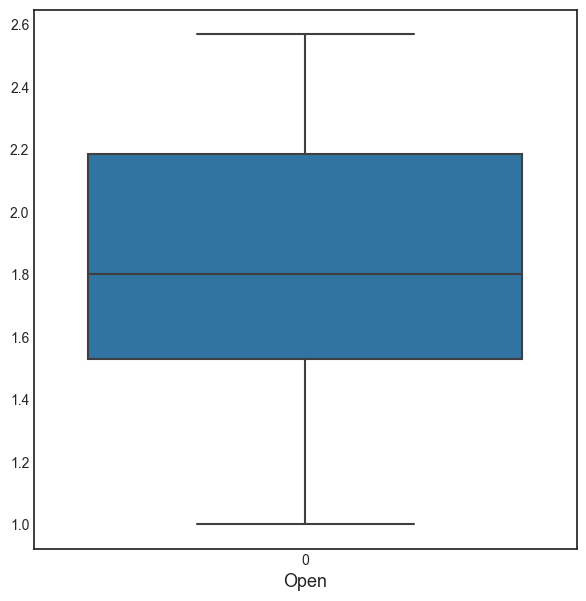

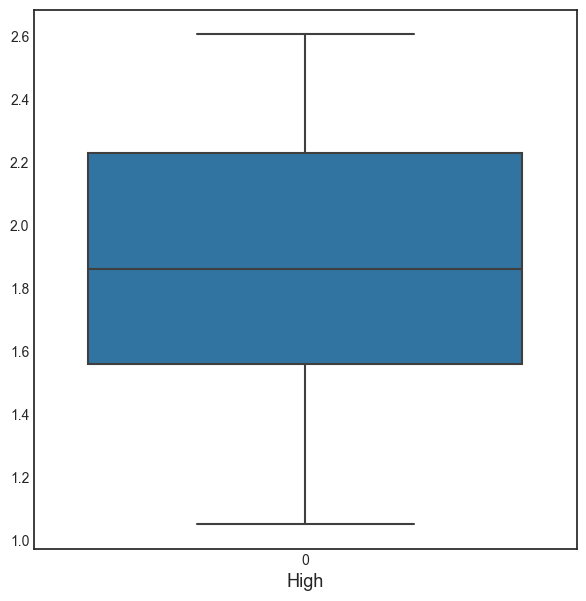

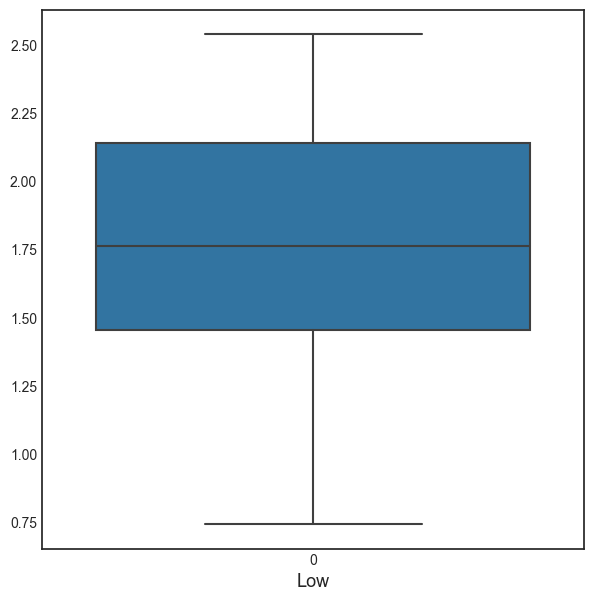

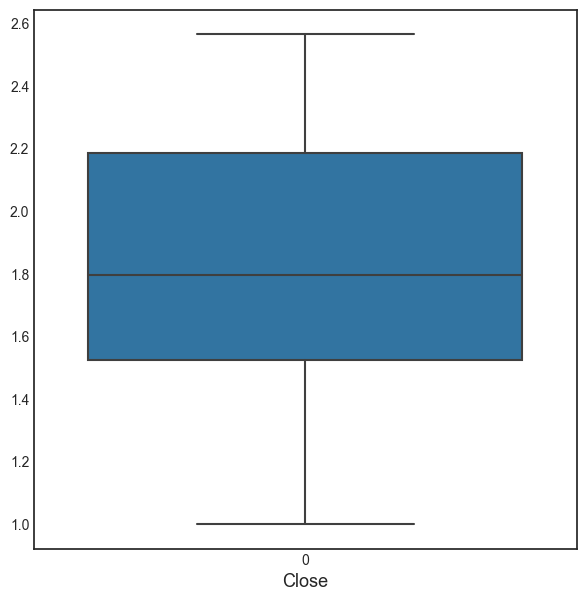

In [35]:
# Handling Outliers & Outlier treatments
for col in df.columns[1:]:
  plt.figure(figsize=(7,7))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

there are no outliers after log transformation

### 3. Categorical Encoding

In [36]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I didn't use OneHotEncoder as all values are of float and datetime

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

In [42]:
# Remove White spaces

#### 6. Rephrase Text

In [43]:
# Rephrase Text

#### 7. Tokenization

In [44]:
# Tokenization

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [46]:
# POS Taging

#### 10. Text Vectorization

In [47]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix for values higher than 0.6
high_correlation = correlation_matrix[correlation_matrix > 0.6]

# Print the filtered correlation matrix
print("Correlation higher than 0.6:")
print(high_correlation)


Correlation higher than 0.6:
           Date      Open      High       Low     Close
Date   1.000000  0.623355  0.637128       NaN  0.606019
Open   0.623355  1.000000  0.993040  0.983978  0.977971
High   0.637128  0.993040  1.000000  0.983422  0.985051
Low         NaN  0.983978  0.983422  1.000000  0.995358
Close  0.606019  0.977971  0.985051  0.995358  1.000000


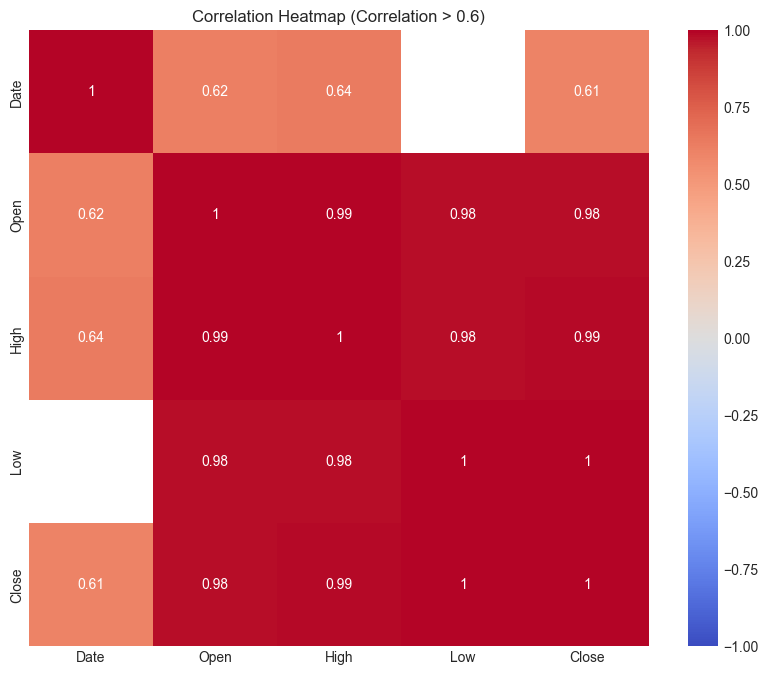

In [49]:

# Calculate correlation matrix
corr_matrix = df.corr()

# Filter correlations above 0.6
high_corr_matrix = corr_matrix[abs(corr_matrix) > 0.6]

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Correlation > 0.6)')
plt.show()

In [50]:
# Manipulate Features to minimize feature correlation and create new features
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     

In [51]:
#calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Open']]])
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])


variables         VIF
0      Open  175.185704
1      High  167.057523
2       Low   71.574137

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(df[dependent_variable]).values               # applying log transform on our dependent variable.
     

##### What all feature selection methods have you used  and why?

Answer Here.

all thses values are Open,High,Low are independent_variables
and close is dependent_variable

##### Which all features you found important and why?

Answer Here.

on all these values  Open,High,Low the closing price of stock dependents

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
df

Date   Open   High    Low  Close
0   2005-07-01  13.00  14.00  11.25  12.46
1   2005-08-01  12.58  14.88  12.55  13.42
2   2005-09-01  13.48  14.87  12.27  13.30
3   2005-10-01  13.20  14.47  12.40  12.99
4   2005-11-01  13.35  13.88  12.88  13.41
..         ...    ...    ...    ...    ...
180 2020-07-01  25.60  28.30  11.10  11.95
181 2020-08-01  12.00  17.16  11.85  14.37
182 2020-09-01  14.30  15.34  12.75  13.15
183 2020-10-01  13.30  14.01  12.11  12.42
184 2020-11-01  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

### 6. Data Scaling

##### Which method have you used to scale you data and why?

i used min max scaler to keep value between between 0 and 1 or -1 
it is commonly employed in machine learning algorithms to ensure that all features or variables have a similar scale, which can improve the performance and convergence of certain models. 

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

no its not required as may already have a low number of relevant features,  the specific analysis or modeling task may not require reducing the dimensionality

In [54]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [55]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(df[dependent_variable]).values               # applying log transform on our dependent variable.
     

In [56]:
# splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)       # we keep 20% of the data in test set.
     
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148, 1)
(37, 1)


##### What data splitting ratio have you used and why? 

Answer Here.
i used 20 % as test data and 80 % as training data 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.
it is not  Imbalanced Dataset

In [57]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

we can use these method to handle
Cross-Validation
Under Sampling
Over Sampling
SMOTE
The Metric Trap
Penalise Algorithms
Tree-Based Algorithms
an Imbalanced Dataset

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
     


In [60]:
# checking the values.
x_train[0:10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

In [61]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('Mean Absolute Error ',mae)
    print('Mean squared Error',mse)
    print('Root Mean squared Error',rmse)
    print('R2_Score',r2s)

In [62]:

# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(x_train, y_train)

LinearRegression()

In [64]:

step1 = LinearRegression()

pipe_lr = Pipeline([('step1',step1)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

Mean Absolute Error  0.01732824998423147
Mean squared Error 0.0008146348135191457
Root Mean squared Error 0.028541808168354464
R2_Score 0.9956268809883747


In [65]:
# Predicting on our test data.
y_pred_linear = model_lr.predict(x_test)

In [66]:

# Checking the model parameters. printing the intercept.
model_lr.intercept_

array([1.79986471])

In [67]:

# printing the model coefficients.
model_lr.coef_

array([[-0.22992597,  0.33533242,  0.31585415]])

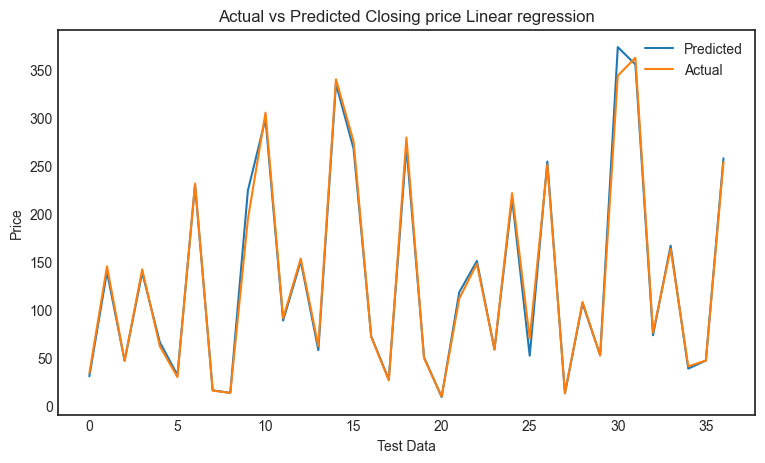

In [68]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_linear)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Lasso Regression with cross validated regularization.

In [70]:

# Importing Lasso model.
from sklearn.linear_model import Lasso

In [71]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [72]:
# Printing the intercept and coefficients.
lasso.intercept_

array([1.79986471])

In [73]:
lasso.coef_

array([-0.2079326 ,  0.319775  ,  0.30927158])

In [74]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                  
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [75]:
# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter value.
     

{'alpha': 1e-05}

In [76]:
# getting the best score
lasso_regressor.best_score_
     

-0.001153015667187284

In [77]:

# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


In [78]:

step1 = lasso

lasso = Pipeline([('step2',step1)])

lasso.fit(x_train,y_train)

ypred_lr = lasso_regressor.predict(x_test)

eval_model(y_test,y_pred_lasso)

Mean Absolute Error  0.017351739300980037
Mean squared Error 0.0008169699006967221
Root Mean squared Error 0.02858268533040103
R2_Score 0.9956143457836908


Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

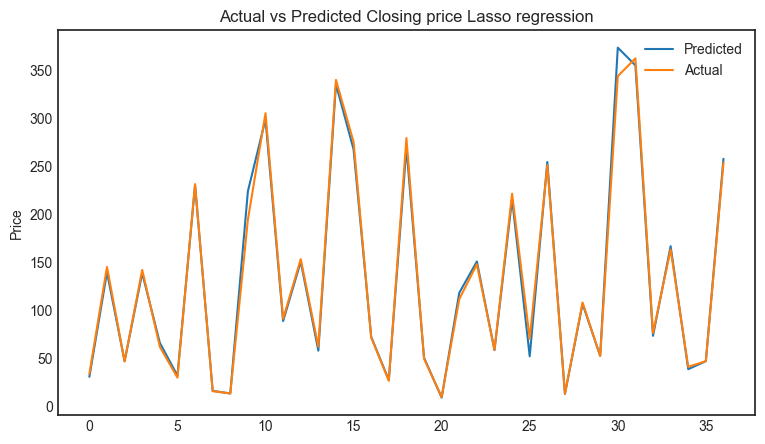

In [79]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

i used  GridSearchCV   It is a brute-force search method that exhaustively tries all possible combinations of hyperparameter values within a specified range. It works by creating a grid of hyperparameters and their corresponding values, and then systematically evaluates each combination using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.


there is no much improvement

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart
step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([('step2',step2)])

pipe_ridge.fit(x_train,y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model(y_test,ypred_ridge)

Mean Absolute Error  0.025425418866126676
Mean squared Error 0.0018313395924040654
Root Mean squared Error 0.04279415371758233
R2_Score 0.9901690108802401


#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# importing ridge regressor model.
from sklearn.linear_model import Ridge    
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [82]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_
     

{'alpha': 0.001}

In [83]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.0011689138440247218

In [84]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [85]:
# Visualizing evaluation Metric Score chart
step2 = GridSearchCV

GridSearchCV = Pipeline([('step2',step2)])

pipe_ridge.fit(x_train,y_train)

ypred_ridge = ridge_regressor.predict(x_test)

eval_model(y_test,ypred_ridge)

Mean Absolute Error  0.01733168496816722
Mean squared Error 0.0008150481663993099
Root Mean squared Error 0.02854904843246636
R2_Score 0.9956246620292671


Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

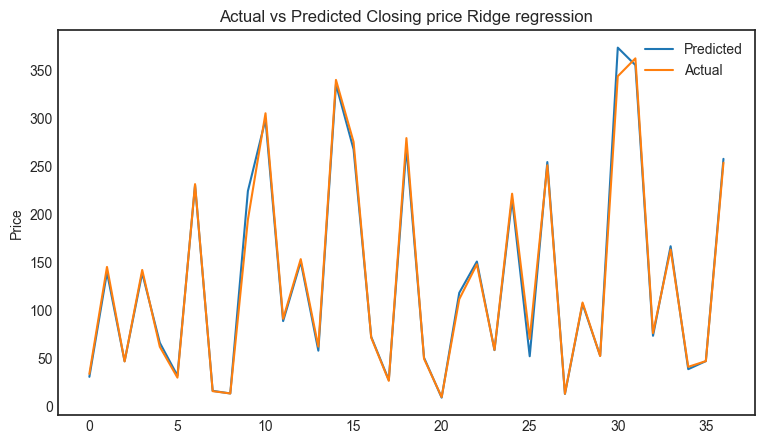

In [86]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")
     

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

i used GridSearchCV with alpha

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

there are not much improvement 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

Mean Absolute Error (MAE) and Mean Squared Error (MSE): These metrics measure the average absolute and squared differences between the predicted and actual values, respectively. They are commonly used for regression problems. The interpretation of these metrics depends on the specific business context and the units of the target variable. Lower MAE or MSE indicates smaller prediction errors, which can lead to more accurate forecasts, optimized inventory management, improved resource allocation, and better decision-making.

RMSE is beneficial in business scenarios where the magnitude of prediction errors is critical. For example, in financial forecasting or demand prediction, accurate estimation of values is crucial for budgeting, resource allocation, inventory management, or production planning. A lower RMSE indicates improved accuracy in predictions, leading to better decision-making, reduced costs, and improved operational efficiency.

R2 score provides insights into how well the regression model explains the variability in the data. It helps assess the predictive power of the model and its business implications. A higher R2 score indicates that the model captures a significant portion of the target variable's variance and provides valuable insights for decision-making. It can contribute to more accurate forecasting, risk assessment, pricing strategies, and resource planning in various business domains.

### ML Model - 3

In [87]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=15)

pipe_dt = Pipeline([('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

Mean Absolute Error  0.039798550630180826
Mean squared Error 0.002973738705858111
Root Mean squared Error 0.05453199708297974
R2_Score 0.9840363889998565


#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [90]:
from sklearn.metrics import r2_score
score=r2_score(ypred_dt,y_test)
score

0.9841313113687552

In [91]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [92]:
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [93]:
regressorcv.fit(x_train,y_train)

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [94]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [95]:
y_pred=regressorcv.predict(x_test)

In [96]:
step2 =regressorcv

regressorcv=  Pipeline([('step2',step2)])

regressorcv.fit(x_train,y_train)

ypred_dt_cv = regressorcv.predict(x_test)

eval_model(y_test,ypred_dt_cv)

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

E:\New folder\envs\mito\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

Mean Absolute Error  0.03921525878200543
Mean squared Error 0.0065358935186291085
Root Mean squared Error 0.08084487317467391
R2_Score 0.9649140452507757


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

 these are best  parameters I used  to tune the decision tree
 {'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

the score are pretty same oly point difference are there

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [97]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [98]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***